<a href="https://colab.research.google.com/github/BickNutler/Springboard/blob/main/Nicholas_Butler_Completed_Euclidean_and_Manhattan_Distances_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Euclidean and Manhattan Distance Calculations

In this short mini project you will see examples and comparisons of distance measures. Specifically, you'll visually compare the Euclidean distance to the Manhattan distance measures. The application of distance measures has a multitude of uses in data science and is the foundation of many algorithms you'll be using such as Prinical Components Analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')

In [15]:
# Load Course Numerical Dataset
df = pd.read_csv('/content/distance_dataset.csv',index_col=0)
df.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


### Euclidean Distance

Let's visualize the difference between the Euclidean and Manhattan distance.

We are using Pandas to load our dataset .CSV file and use Numpy to compute the __Euclidean distance__ to the point (Y=5, Z=5) that we choose as reference. On the left here we show the dataset projected onto the YZ plane and color coded per the Euclidean distance we just computed. As we are used to, points that lie at the same Euclidean distance define a regular 2D circle of radius that distance.

Note that the __SciPy library__ comes with optimized functions written in C to compute distances (in the scipy.spatial.distance module) that are much faster than our (naive) implementation.

In [16]:
# In the Y-Z plane, we compute the distance to ref point (5,5)
distEuclid5 = np.sqrt((df.Z - 5)**2 + (df.Y - 5)**2)

**<font color='teal'>Create a distance to reference point (3,3) matrix similar to the above example.</font>**

In [17]:
# In the Y-Z plane, we compute the distance to ref point (3,3)
distEuclid3 = np.sqrt((df.Z - 3)**2 + (df.Y - 3)**2)

**<font color='teal'>Replace the value set to 'c' in the plotting cell below with your own distance matrix and review the result to deepen your understanding of Euclidean distances. </font>**

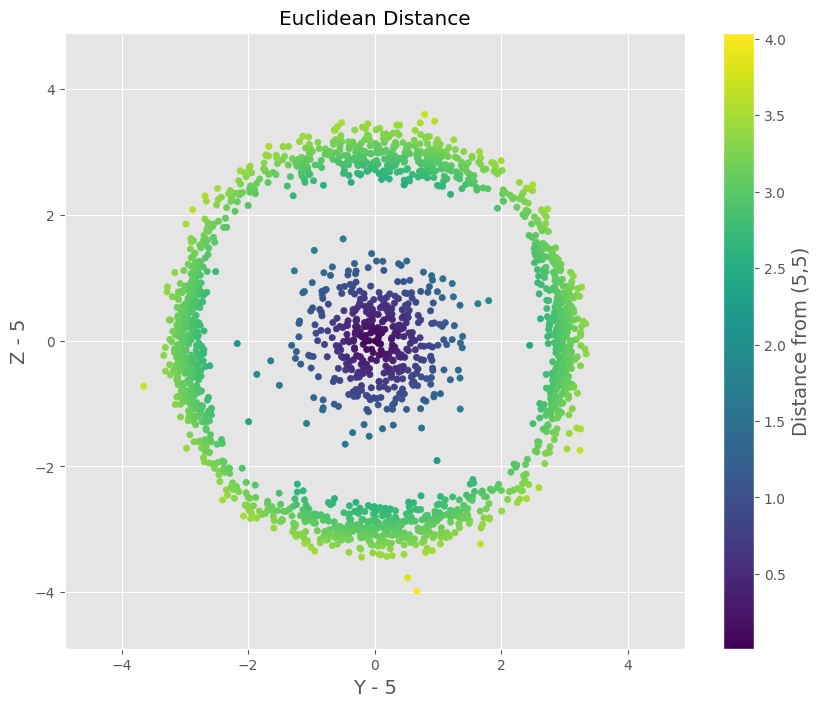

In [18]:
figEuclid = plt.figure(figsize=[10,8])

plt.scatter(df.Y - 5, df.Z-5, c=distEuclid5, s=20)
plt.ylim([-4.9,4.9])
plt.xlim([-4.9,4.9])
plt.xlabel('Y - 5', size=14)
plt.ylabel('Z - 5', size=14)
plt.title('Euclidean Distance')
cb = plt.colorbar()
cb.set_label('Distance from (5,5)', size=14)

#figEuclid.savefig('plots/Euclidean.png')

Comparing the given plot with the reference point at (5,5) with our new reference point of (3,3), we can see the closest points are no longer in the center cluster with similar distance from all the outer ring of points. Now the bottom left of the ring is the closest and we have a gradient of distance moving along the Y=Z line.

### Manhattan Distance

Manhattan distance is simply the sum of absolute differences between the points coordinates. This distance is also known as the taxicab or city block distance as it measure distances along the coorinate axis which creates "paths" that look like a cab's route on a grid-style city map.

We display the dataset projected on the XZ plane here color coded per the Manhattan distance to the (X=5, Z=5) reference point. We can see that points laying at the same distance define a circle that looks like a Euclidean square.

In [19]:
# In the Y-Z plane, we compute the distance to ref point (5,5)
distManhattan5 = np.abs(df.X - 5) + np.abs(df.Z - 5)

**<font color='teal'>Create a Manhattan distance to reference point (4,4) matrix similar to the above example and replace the value for 'c' in the plotting cell to view the result.</font>**

In [20]:
# In the Y-Z plane, we compute the distance to ref point (4,4)
distManhattan4 = np.abs(df.X - 4) + np.abs(df.Z - 4)

Now let's create distributions of these distance metrics and compare them. We leverage the scipy dist function to create these matrices similar to how you manually created them earlier in the exercise.

In [21]:
import scipy.spatial.distance as dist

mat = df[['X','Y','Z']].to_numpy()
DistEuclid = dist.pdist(mat,'euclidean')
DistManhattan = dist.pdist(mat, 'cityblock')
largeMat = np.random.random((10000,100))

**<font color='teal'>Plot histograms of each distance matrix for comparison.</font>**

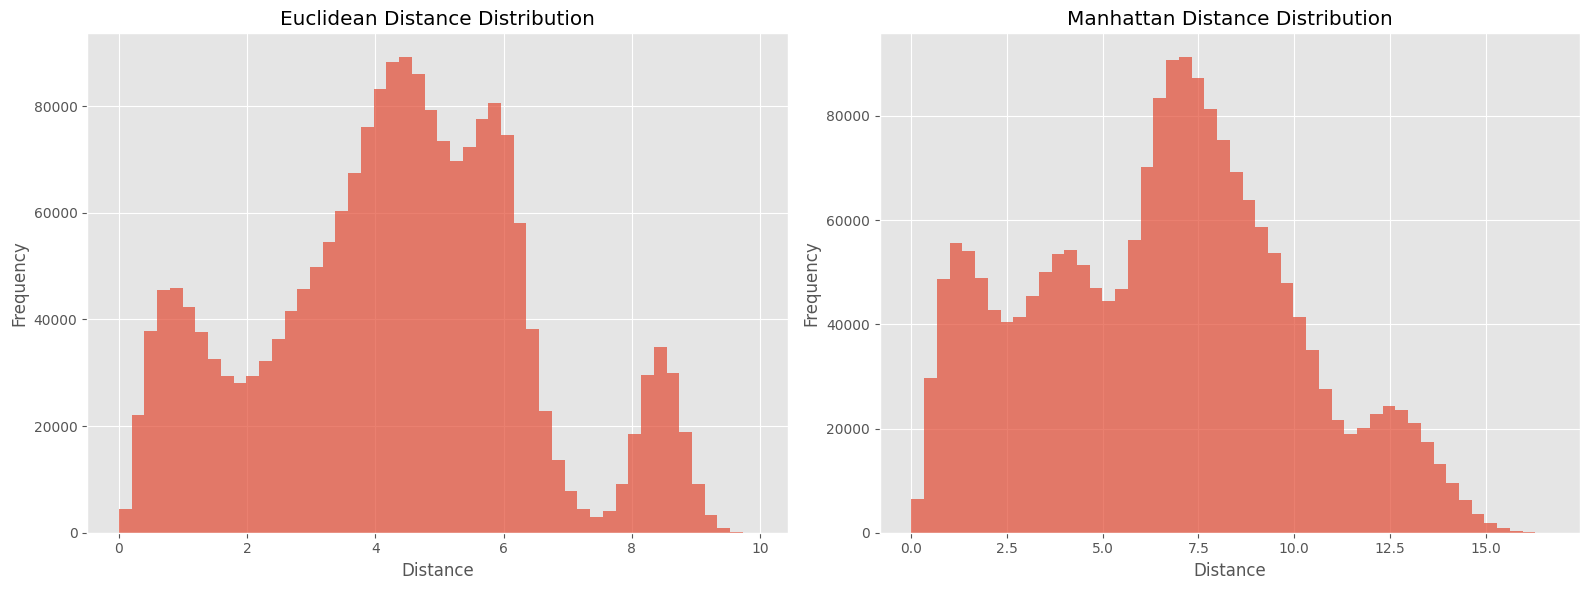

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.hist(DistEuclid, bins=50, alpha=0.7)
ax1.set_title('Euclidean Distance Distribution')
ax1.set_xlabel('Distance')
ax1.set_ylabel('Frequency')

ax2.hist(DistManhattan, bins=50, alpha=0.7)
ax2.set_title('Manhattan Distance Distribution')
ax2.set_xlabel('Distance')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

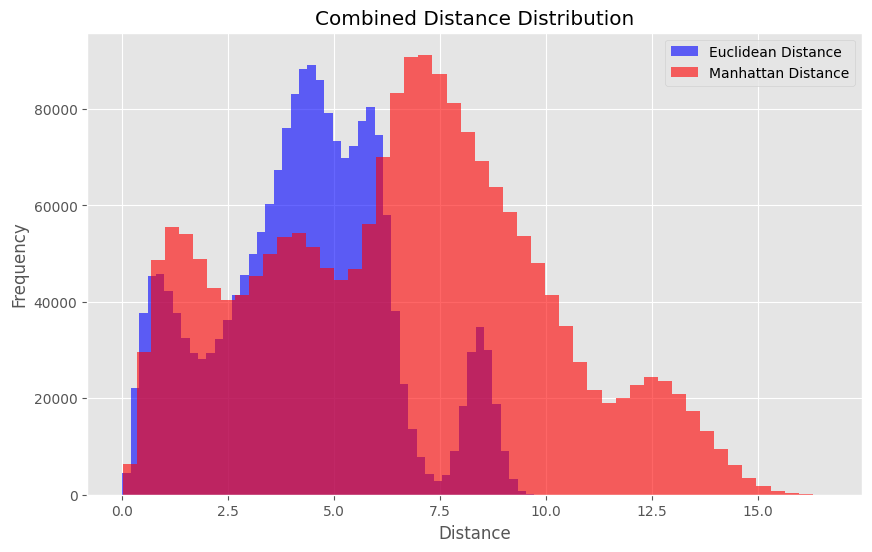

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(DistEuclid, bins=50, alpha=0.6, label='Euclidean Distance', color='blue')
plt.hist(DistManhattan, bins=50, alpha=0.6, label='Manhattan Distance', color='red')
plt.title('Combined Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
print(f"Average Euclidean Distance: {np.mean(DistEuclid):.2f}")
print(f"Average Manhattan Distance: {np.mean(DistManhattan):.2f}")

Average Euclidean Distance: 4.30
Average Manhattan Distance: 6.57


In [28]:
# Check if all Manhattan distances are greater than or equal to Euclidean distances
# Ensure DistEuclid and DistManhattan are defined globally or passed if this were a function.
# (They are already defined from previous cells)

if len(DistEuclid) != len(DistManhattan):
    print("Error: Distance arrays must have the same length.")
    all_greater_or_equal = False # Set to False if lengths don't match
else:
    all_greater_or_equal = np.all(DistManhattan >= DistEuclid)

    if all_greater_or_equal:
        print("Confirmation: All Manhattan distances are greater than or equal to their corresponding Euclidean distances.")
    else:
        violating_indices = np.where(DistManhattan < DistEuclid)[0]
        print(f"Warning: Not all Manhattan distances are greater than or equal to Euclidean distances.")
        if len(violating_indices) > 0:
            print(f"Found {len(violating_indices)} instances where Manhattan < Euclidean. First instance at index {violating_indices[0]}:")
            print(f"  Euclidean: {DistEuclid[violating_indices[0]]:.4f}, Manhattan: {DistManhattan[violating_indices[0]]:.4f}")

# To match the previous output, which included the return value of the function.
all_greater_or_equal

Confirmation: All Manhattan distances are greater than or equal to their corresponding Euclidean distances.


np.True_

Putting our histograms on the same plane allows to very easily see that the manhattan distance covers a much wider range of distance values

This makes logical sense, as we know for right triangles, the sum of the two sides will always be less than that of the hypotenuse causing the manhattan distance at a particular point to be greater than the euclidean distance at that same point.